In [1]:
import pandas as pd

dfSolar = pd.read_csv('C:/Data/T102_103_301_401_3.csv', encoding = 'utf-8')

In [2]:
dfSolar2 = dfSolar.loc[:,["id","school_name","TodayKWH","kwh_kwp","Temp","PR","averageIrr","solarHour","INV_No","INV_Brand","INV_Type","Site_Capacity","PV_No","PV_W","PV_Brand","PV_Style"]]
dfSolar2.head()

,id,school_name,TodayKWH,kwh_kwp,Temp,PR,averageIrr,solarHour,INV_No,INV_Brand,INV_Type,Site_Capacity,PV_No,PV_W,PV_Brand,PV_Style
0,2947688,80102,201,2.24,25.9,79.64,275.66,10.20,18,Delta,5,90.0,360,250,NSP,WoDing
1,2942151,80102,322,3.58,26.8,71.74,474.40,10.51,18,Delta,5,90.0,360,250,NSP,WoDing
2,2936805,80102,212,2.35,26.2,77.27,294.22,10.36,18,Delta,5,90.0,360,250,NSP,WoDing
3,2931628,80102,241,2.67,27.1,73.52,345.68,10.52,18,Delta,5,90.0,360,250,NSP,WoDing
4,2926172,80102,263,2.92,26.5,75.54,365.89,10.58,18,Delta,5,90.0,360,250,NSP,WoDing


In [52]:
dfSolar2["PV_Brand"].values

array(['NSP', 'NSP', 'NSP', ..., 'BenQ', 'BenQ', 'BenQ'], dtype=object)

In [3]:
from sklearn.preprocessing import LabelEncoder

class_le = LabelEncoder()
dfSolar2["PV_Brand"] = class_le.fit_transform(dfSolar2["PV_Brand"].values)
dfSolar2["PV_Brand"].values

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

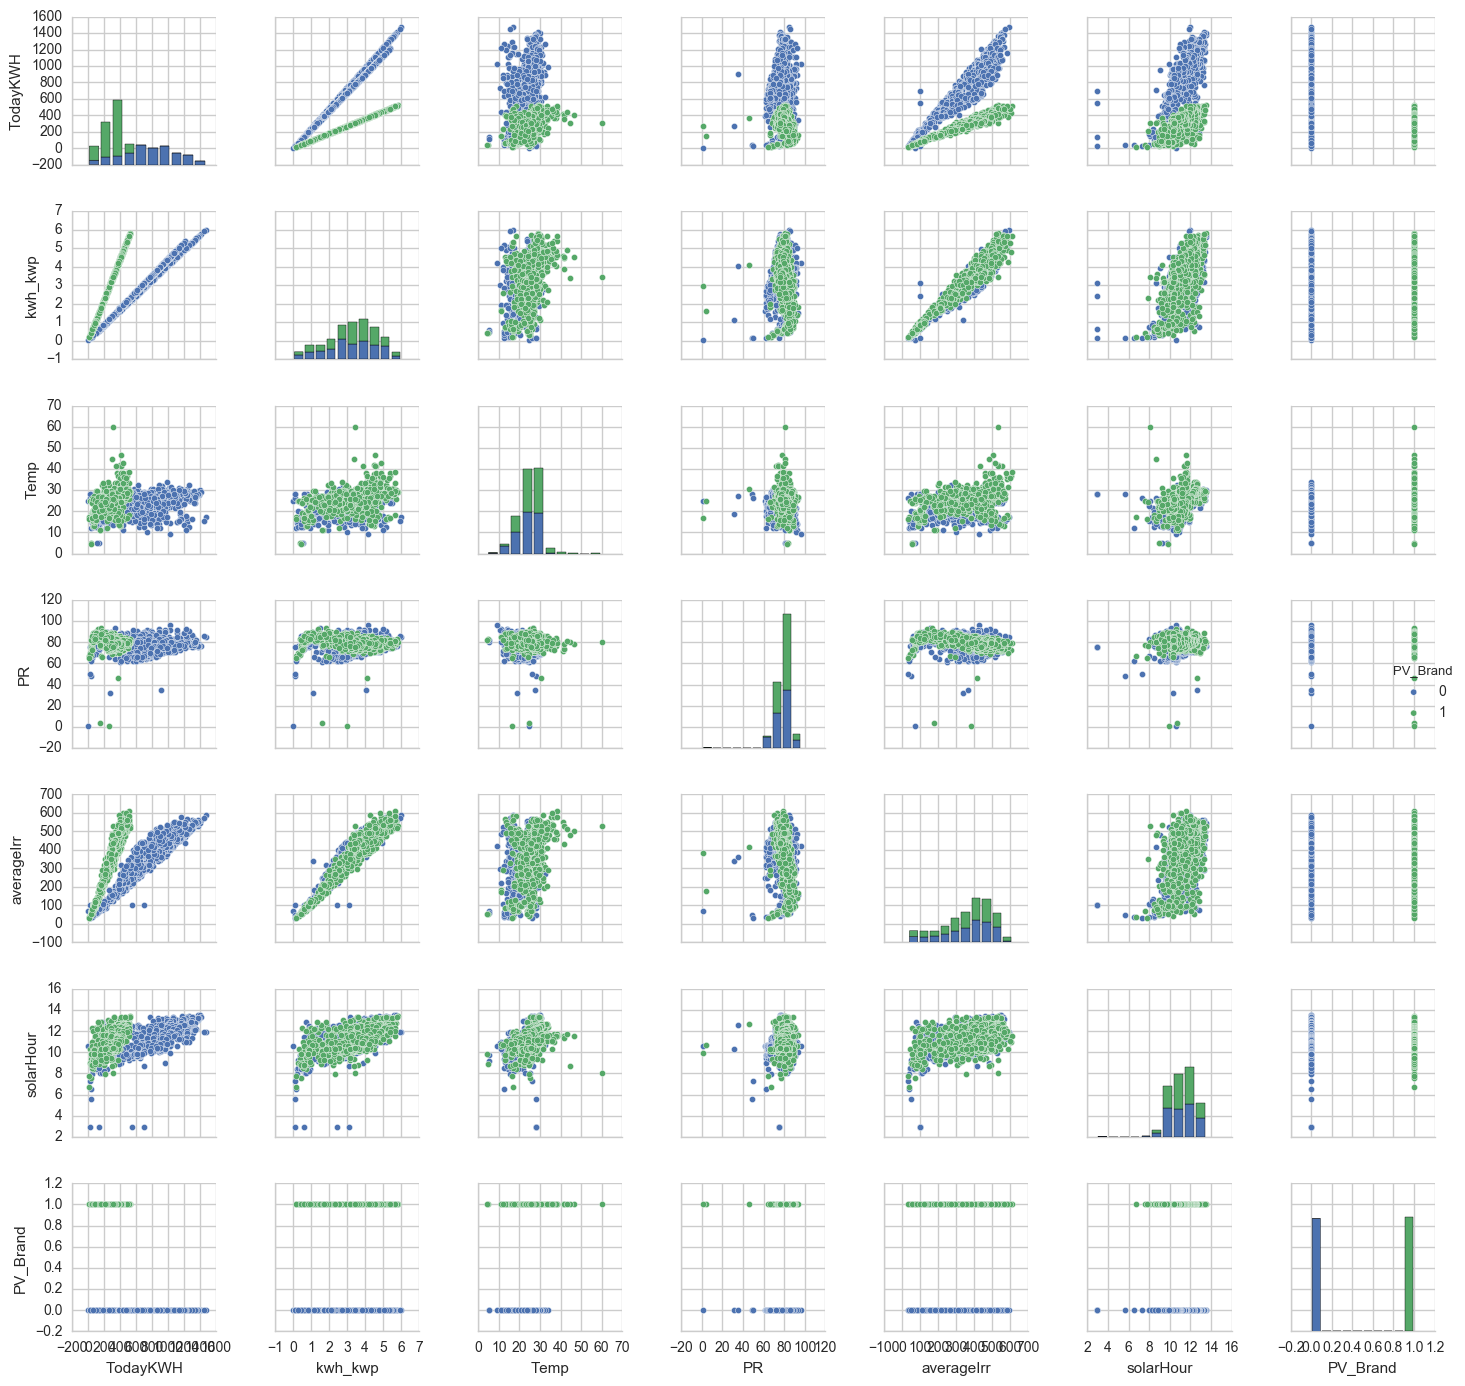

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', context='notebook')
cols = ["TodayKWH","kwh_kwp","Temp","PR","averageIrr","solarHour","PV_Brand"]

sns.pairplot(dfSolar2[cols], size=2,hue="PV_Brand");
plt.tight_layout()
plt.show()

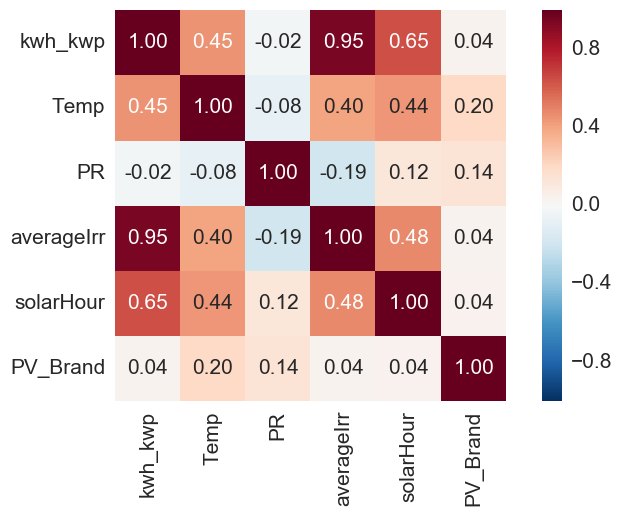

In [5]:
#若要P-value看下面這篇，有神人提供自己寫的Function
#http://stackoverflow.com/questions/24432101/correlation-coefficients-and-p-values-for-all-pairs-of-rows-of-a-matrix
#單純要get pvalue在Numpy 的package似乎是無法提供，要用另一個package:scipy
import numpy as np
cols = ["kwh_kwp","Temp","PR","averageIrr","solarHour","PV_Brand"]
cm = np.corrcoef(dfSolar2[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, 
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 15},
            yticklabels=cols,
            xticklabels=cols)

plt.tight_layout()
plt.show()

In [7]:
import scipy.spatial.distance as dist
import scipy.stats as ss
cols = ["kwh_kwp","Temp","PR","averageIrr","solarHour","PV_Brand"]

# Pearson's correlation coefficients
#dist.squareform(dist.pdist(dfSolar2[cols].values.T, lambda x, y: ss.pearsonr(x, y)[0]))
dfcorrcoef = pd.DataFrame(dist.squareform(dist.pdist(dfSolar2[cols].values.T, lambda x, y: ss.pearsonr(x, y)[0])))
dfcorrcoef.rename(columns = {0:"kwh_kwp",1:"Temp",2:"PR",3:"averageIrr",4:"solarHour",5:"PV_Brand"},index ={0:"kwh_kwp",1:"Temp",2:"PR",3:"averageIrr",4:"solarHour",5:"PV_Brand"}, inplace=True)

# p-values
#dist.squareform(dist.pdist(dfSolar2[cols].values.T, lambda x, y: ss.pearsonr(x, y)[1]))
dfPvalues = pd.DataFrame(dist.squareform(dist.pdist(dfSolar2[cols].values.T, lambda x, y: ss.pearsonr(x, y)[1])))
dfPvalues.rename(columns = {0:"kwh_kwp",1:"Temp",2:"PR",3:"averageIrr",4:"solarHour",5:"PV_Brand"},index ={0:"kwh_kwp",1:"Temp",2:"PR",3:"averageIrr",4:"solarHour",5:"PV_Brand"}, inplace=True)

In [8]:
dfPvalues

,kwh_kwp,Temp,PR,averageIrr,solarHour,PV_Brand
kwh_kwp,0.000000e+00,1.221464e-68,3.665285e-01,0.000000e+00,2.307863e-164,1.870330e-01
Temp,1.221464e-68,0.000000e+00,3.101342e-03,7.951518e-55,1.532983e-66,2.115699e-13
PR,3.665285e-01,3.101342e-03,0.000000e+00,4.466609e-13,3.617957e-06,1.957340e-07
averageIrr,0.000000e+00,7.951518e-55,4.466609e-13,0.000000e+00,9.025168e-80,1.887883e-01
solarHour,2.307863e-164,1.532983e-66,3.617957e-06,9.025168e-80,0.000000e+00,1.463486e-01
PV_Brand,1.870330e-01,2.115699e-13,1.957340e-07,1.887883e-01,1.463486e-01,0.000000e+00


In [10]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
#cols = ["kwh_kwp","Temp","PR","averageIrr","solarHour","PV_Brand"]
cols = ["kwh_kwp","PR","averageIrr","solarHour"]
dfSolar2[cols]

X, y = dfSolar2[cols].iloc[:, 1:].values, dfSolar2[cols].iloc[:, 0].values

mlr = LinearRegression()
mlr.fit(X, y)

print('Intercept: %.3f' % mlr.intercept_)
print('coef1: %.3f' % mlr.coef_[0])
print('coef2: %.3f' % mlr.coef_[1])
print('coef3: %.3f' % mlr.coef_[2])
#print('coef4: %.3f' % mlr.coef_[3])
#print('coef5: %.3f' % mlr.coef_[4])

Intercept: -4.149
coef1: 0.022
coef2: 0.009
coef3: 0.234


In [11]:
# sklearn.linear_model 竟然沒有提供 P-value! (是資工系的傲慢嗎???)
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                 1.141e+04
Date:                Sat, 20 May 2017   Prob (F-statistic):               0.00
Time:                        19:44:13   Log-Likelihood:                -105.32
No. Observations:                1383   AIC:                             218.6
Df Residuals:                    1379   BIC:                             239.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -4.1488      0.096    -43.262      0.0

In [60]:
#預測
cols = ["kwh_kwp","PR","averageIrr","solarHour"]
dfSolar2[cols]

X, y = dfSolar2[cols].iloc[:, 1:].values, dfSolar2[cols].iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

mlr = LinearRegression()
mlr.fit(X_train, y_train)

y_pred = mlr.predict(X_test)

print('Intercept: %.3f' % mlr.intercept_)
print('coef1: %.3f' % mlr.coef_[0])
print('coef2: %.3f' % mlr.coef_[1])
print('coef3: %.3f' % mlr.coef_[2])
print('coef4: %.3f' % mlr.coef_[3])
print('coef5: %.3f' % mlr.coef_[4])
pd.DataFrame(y_pred).head()

Intercept: -3.828
coef1: 0.009
coef2: 0.021
coef3: 0.009
coef4: 0.196
coef5: -0.065


,0
0,1.612059
1,3.978187
2,3.360901
3,4.236107
4,2.822706


In [61]:
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')

plt.tight_layout()
# plt.savefig('./figures/confusion_matrix.png', dpi=300)
plt.show()

ValueError: continuous is not supported

In [87]:
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

#cols = ["Temp","PR","averageIrr","solarHour","PV_Brand"]
cols = ["kwh_kwp","Temp","PR","averageIrr","solarHour"]

X, y = dfSolar2[cols].iloc[:, 1:].values, dfSolar2[cols].iloc[:, 0].values
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#X_std = sc.fit_transform(X)
#X_train_std = sc.fit_transform(X_train)
#X_test_std = sc.fit_transform(X_test)

corr_mat = np.corrcoef(X.T) # 計算相關係數矩陣
#cov_mat = np.cov(X_std.T) # 計算共變異數矩陣
eigen_vals, eigen_vecs = np.linalg.eig(corr_mat) # 分解為特徵值(eigen_vals), 特徵向量(eigen_vecs)

print('\nEigenvalues \n%s' % eigen_vals) # 特徵值
# 計算解釋變異數比率
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)] # 特徵值由大到小排序
cum_var_exp = np.cumsum(var_exp) # 特徵值 -> 變異數解釋能力
print('\nCumulative Variance: ' + str(cum_var_exp))


Eigenvalues 
[ 1.88841136  0.60307438  0.42487535  1.08363892]

Cumulative Variance: [ 0.47210284  0.74301257  0.89378116  1.        ]


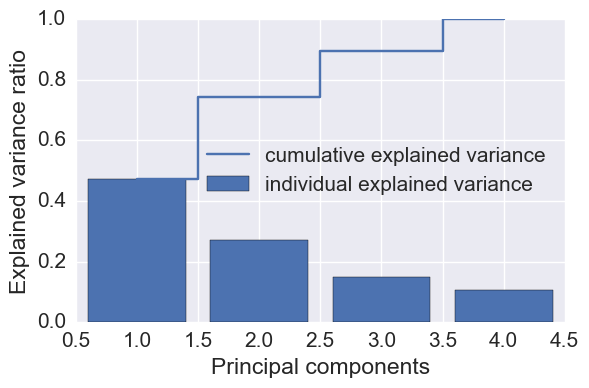

In [89]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(range(1, 5), var_exp, alpha=1, align='center',
        label='individual explained variance')
plt.step(range(1, 5), cum_var_exp, where='mid',
         label='cumulative explained variance') # 階梯線 累加特徵值解釋能力
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

[ 0.47210284  0.27090973]


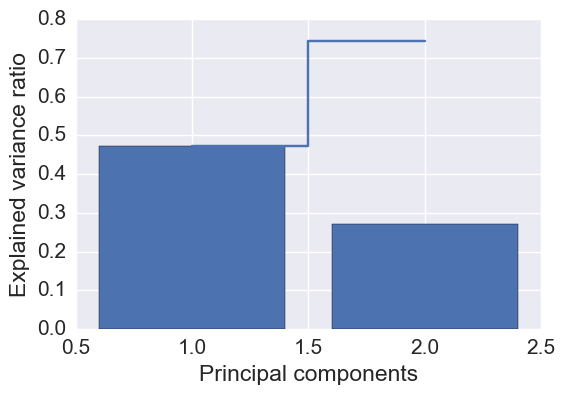

In [99]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# explained_variance_ratio_ 屬性: 計算主成份的解釋變異率

X_std = sc.fit_transform(X)
pca = PCA(n_components=2)
#X_pca = pca.fit_transform(corr_mat)
X_pca = pca.fit_transform(X_std)
#Get the components from transforming the original data.
#scores = pca.transform(X_std)
print(pca.explained_variance_ratio_)

# 繪製 主成份解釋變異圖, 顯示特徵值解釋能力
plt.bar(range(1, 3), pca.explained_variance_ratio_, alpha=1, align='center',label='individual explained variance')
plt.step(range(1, 3), np.cumsum(pca.explained_variance_ratio_), where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [105]:
X_pca[:,0],X_pca[:,1]

array([ 0.72726599, -0.49105183,  0.50625137, ...,  0.84412283,
        0.59901491,  0.35947679])

In [106]:
X_pca

array([[ 0.72726599,  0.04961023],
       [-0.49105183,  1.26758752],
       [ 0.50625137,  0.33999766],
       ..., 
       [ 0.84412283,  2.14752962],
       [ 0.59901491,  2.23222631],
       [ 0.35947679,  2.04239351]])

In [101]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X_pca, y)

print('Intercept: %.3f' % mlr.intercept_)
print('coef1: %.3f' % mlr.coef_[0])
print('coef2: %.3f' % mlr.coef_[1])
#print('coef3: %.3f' % mlr.coef_[2])
#print('coef4: %.3f' % mlr.coef_[3])
#print('coef5: %.3f' % mlr.coef_[4])

Intercept: 3.289
coef1: -0.830
coef2: -0.026


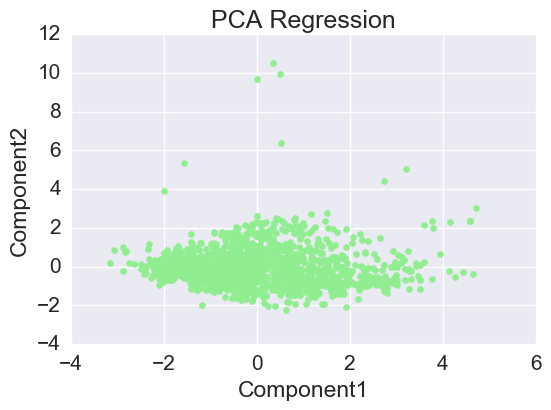

In [114]:
plt.scatter(X_pca[:,0],X_pca[:,1],color='lightgreen')
#plt.plot(X_test, mlr.predict(X_test), color='blue',linewidth=3)
plt.xlabel("Component1")
plt.ylabel("Component2")
plt.title("PCA Regression")

plt.show()

In [102]:
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X_pca)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     1962.
Date:                Sun, 21 May 2017   Prob (F-statistic):               0.00
Time:                        15:04:06   Log-Likelihood:                -1422.7
No. Observations:                1383   AIC:                             2851.
Df Residuals:                    1380   BIC:                             2867.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          3.2893      0.018    180.516      0.0

In [2]:
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder

dfSolar = pd.read_csv('C:/Data/T102_103_301_401_3.csv', encoding = 'utf-8')
dfSolar2 = dfSolar.loc[:,["id","school_name","TodayKWH","kwh_kwp","Temp","PR","averageIrr","solarHour","INV_No","INV_Brand","INV_Type","Site_Capacity","PV_No","PV_W","PV_Brand","PV_Style"]]

class_le = LabelEncoder()
dfSolar2["PV_Brand"] = class_le.fit_transform(dfSolar2["PV_Brand"].values)
dfSolar2["PV_Style"] = class_le.fit_transform(dfSolar2["PV_Style"].values)

cols = ["Temp","PR","averageIrr","solarHour","PV_Brand","PV_Style"]
X, y = dfSolar2[cols].iloc[:, 1:].values, dfSolar2[cols].iloc[:, 0].values

C:\Program Files\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [115]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

pipe = Pipeline([('scl', StandardScaler()),
            ('pca', PCA(n_components=2)),
            ('glm', LinearRegression(n_jobs=1))])

pipe.fit(X, y)

Pipeline(steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('glm', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [ ]:
#Pipeline 使用pipline的圖表呢???



In [117]:
import pandas as pd
dfSolar = pd.read_csv('C:/Data/T102_103_301_401_3.csv', encoding = 'utf-8')
dfSolar2 = dfSolar.loc[:,["id","school_name","TodayKWH","kwh_kwp","Temp","PR","averageIrr","solarHour","INV_No","INV_Brand","INV_Type","Site_Capacity","PV_No","PV_W","PV_Brand","PV_Style"]]


In [158]:
dfSolar2.loc[:,["school_name","TodayKWH","kwh_kwp","averageIrr","solarHour","Temp","PR"]].head()

,school_name,TodayKWH,kwh_kwp,averageIrr,solarHour,Temp,PR
0,80102,201,2.24,275.66,10.20,25.9,79.64
1,80102,322,3.58,474.40,10.51,26.8,71.74
2,80102,212,2.35,294.22,10.36,26.2,77.27
3,80102,241,2.67,345.68,10.52,27.1,73.52
4,80102,263,2.92,365.89,10.58,26.5,75.54


In [118]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
class_le = LabelEncoder()

cols = ["school_name","Temp","PR","kwh_kwp","TodayKWH","averageIrr","solarHour"]
#dfSolar2["school_name"] = class_le.fit_transform(dfSolar2[cols].loc[:,["school_name"]].values)
X, y = dfSolar2[cols].iloc[:,4:6].values, dfSolar2[cols].iloc[:, 0].values

In [119]:
X

array([[ 201.  ,  275.66],
       [ 322.  ,  474.4 ],
       [ 212.  ,  294.22],
       ..., 
       [ 472.  ,  310.55],
       [ 595.  ,  390.55],
       [ 615.  ,  410.81]])

In [120]:
#看averageIrr:平均日照強度 , solarHour:日照時數 對案場的分群是否有明顯的2群或4群?
km = KMeans(n_clusters=2, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

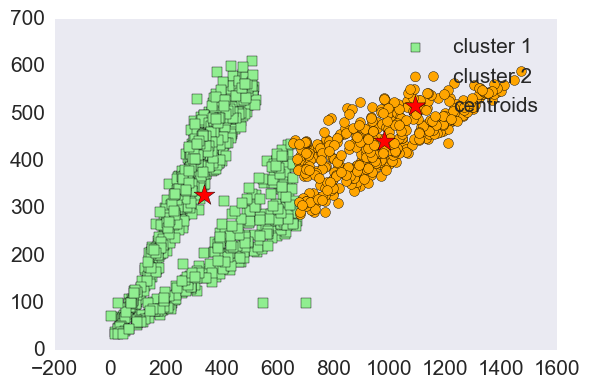

[ 335.50984456  979.62679426]
[ 327.37366839  442.89715311]


In [122]:
plt.scatter(X[y_km==0,0], 
            X[y_km==0,1], 
            s=50, 
            c='lightgreen', 
            marker='s', 
            label='cluster 1')
plt.scatter(X[y_km==1,0], 
            X[y_km==1,1], 
            s=50, 
            c='orange', 
            marker='o', 
            label='cluster 2')
#plt.scatter(X[y_km==2,0], 
#            X[y_km==2,1], 
#            s=50, 
#            c='lightblue', 
#            marker='v', 
#            label='cluster 3')
#plt.scatter(X[y_km==3,0], 
#            X[y_km==3,1], 
#            s=50, 
#            c='lightyellow', 
#            marker='D', 
#            label='cluster 4')
plt.scatter(km.cluster_centers_[:,0], 
            km.cluster_centers_[:,1], 
            s=250, 
            marker='*', 
            c='red', 
            label='centroids')

plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
print(km.cluster_centers_[:,0])
print(km.cluster_centers_[:,1])

In [123]:
estimator = km.fit(X)
#estimator.labels_
#{i: np.where(estimator.labels_ == i)[0] for i in range(estimator.n_clusters)}
#{i: X[np.where(estimator.labels_ == i)] for i in range(estimator.n_clusters)}

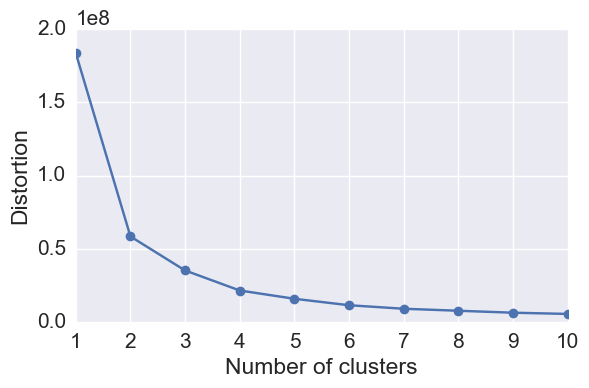

In [124]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions .append(km.inertia_)
plt.plot(range(1,11), distortions , marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

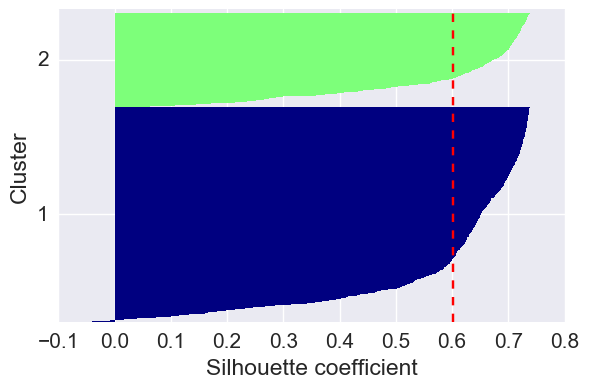

In [125]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples #計算silhouette分數 0~1之間 越接近0代表此樣本分得不好

km = KMeans(n_clusters=2, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]                #‘cityblock’, ‘cosine’, ‘euclidean’, ‘l1’, ‘l2’, ‘manhattan
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean') #歐式距離 
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
            edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()

In [98]:
import pandas as pd
import numpy as np

np.random.seed(123)

variables = ["PR","averageIrr","solarHour"]
labels = dfSolar2.loc[:,["id"]]

X = np.random.random_sample([5,3])*10
df = pd.DataFrame(dfSolar2.loc[:,["PR","averageIrr","solarHour"]].values, columns=variables, index=labels)
#階層的好像不適用!!!
from scipy.spatial.distance import pdist,squareform

row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')), columns=labels, index=labels)
row_dist

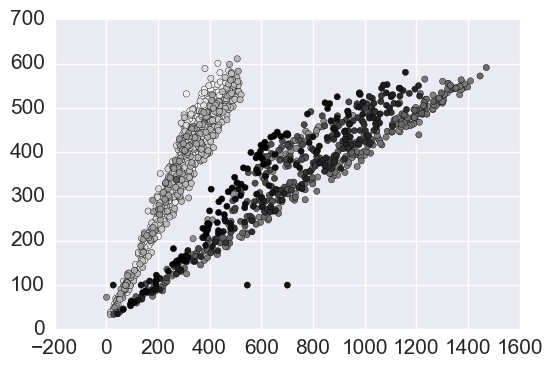

In [130]:
#使用Kmeans一定會依照我們設定的群數去分，但實際上此圖形有很大的可能就只是一群!
#所以我們改採用密度的方式畫圖就可以很自然得出同一群的結論
from sklearn.cluster import DBSCAN
#那麼如果使用DBSCAN效果如何呢？我們先不調參，直接用默認參數 半徑0.5 最小包含5
#y_pred = DBSCAN().fit_predict(X)
#那麼我們可以減少ϵ ϵ-鄰域的大小，默認是0.5，我們減到0.1
#y_pred = DBSCAN(eps = 0.1).fit_predict(X)
#調參增加類別，有兩個方向都是可以的，一個是繼續減少eps，另一個是增加min_samples。我們現在將min_samples從默認的5增加到10，
y_pred = DBSCAN(eps = 0.5, min_samples = 1).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c = y_pred)
plt.show()

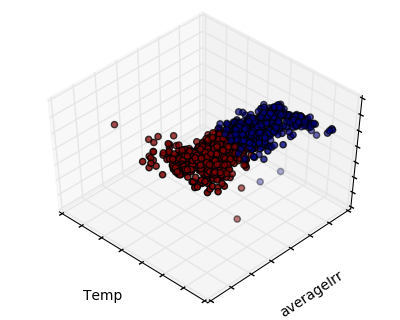

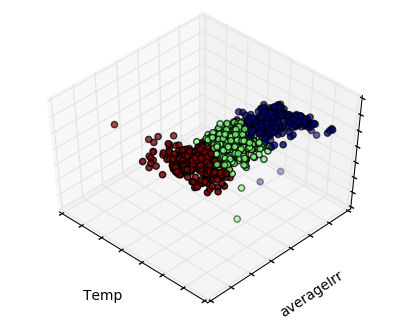

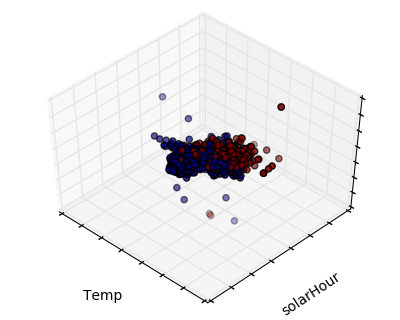

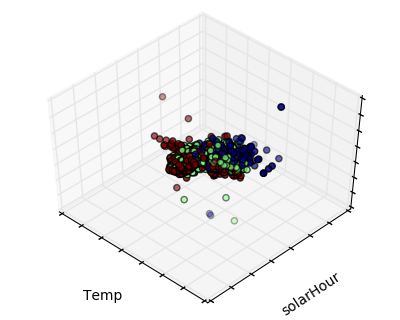

In [28]:
#http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

#centers = [[1, 1], [-1, -1], [1, -1]]
#centers = pca.inverse_transform(kmeans.cluster_centers_)

class_le = LabelEncoder()
dfSolar2["PV_Brand"] = class_le.fit_transform(dfSolar2["PV_Brand"].values)
dfSolar2["PV_Style"] = class_le.fit_transform(dfSolar2["PV_Style"].values)
#cols = ["Temp","PR","averageIrr","solarHour","PV_Brand","PV_Style"]
cols = ["school_name","Temp","PR","averageIrr","solarHour"]
X, y = dfSolar2[cols].iloc[:, 1:].values, dfSolar2[cols].iloc[:, 0].values

estimators = {'k_means_iris_2': KMeans(n_clusters=2,init='k-means++'),
              'k_means_iris_3': KMeans(n_clusters=3,init='k-means++')}

#estimators = {'k_means_iris_2': KMeans(n_clusters=2),
#              'k_means_iris_3': KMeans(n_clusters=3),
#              'k_means_iris_bad_init': KMeans(n_clusters=3, n_init=1,
#                                              init='random')}

fignum = 1
for name, est in estimators.items():
    fig = plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

    plt.cla()
    est.fit(X)
    labels = est.labels_
    
    #Axes3D.scatter(xs, ys, zs=0, zdir='z', s=20, c=None, depthshade=True, *args, **kwargs)
    ax.scatter(X[:, 0], X[:, 2], X[:, 1], c=labels.astype(np.float))

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Temp')
    ax.set_ylabel('averageIrr')
    ax.set_zlabel('PR')
    fignum = fignum + 1

# Plot the ground truth
#fig = plt.figure(fignum, figsize=(4, 3))
#plt.clf()
plt.show()


#------------------------------------換個變數看看-----------------------------------------------#
fignum = 1
for name, est in estimators.items():
    fig = plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

    plt.cla()
    est.fit(X)
    labels = est.labels_
    
    #Axes3D.scatter(xs, ys, zs=0, zdir='z', s=20, c=None, depthshade=True, *args, **kwargs)
    ax.scatter(X[:, 0], X[:, 3], X[:, 1], c=labels.astype(np.float))

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Temp')
    ax.set_ylabel('solarHour')
    ax.set_zlabel('PR')
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
#plt.clf()
plt.show()

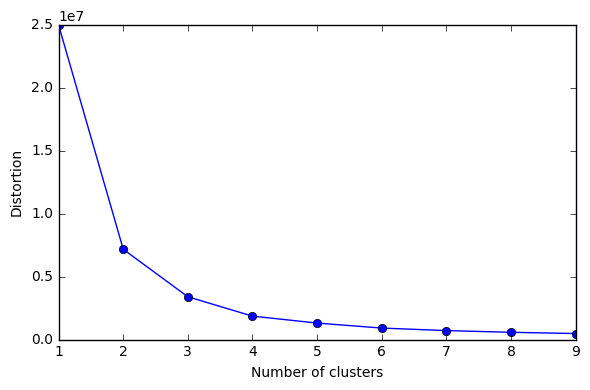

In [37]:
#課本範例
distortions = []
for i in range(1, 10):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=2, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions .append(km.inertia_)
plt.plot(range(1,10), distortions , marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

In [108]:
# Plot the ground truth
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()

for name, label in [('NSP', 0),
                    ('BenQ', 1),
    ax.text3D(X[y == label, 1].mean(),
              X[y == label, 2].mean(),
              X[y == label, 3].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
#y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 3], X[:, 1], c=y)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Temp')
ax.set_ylabel('solarHour')
ax.set_zlabel('PR')
plt.show()

SyntaxError: invalid syntax (<ipython-input-108-ee5dad303110>, line 17)

In [84]:
#http://stackoverflow.com/questions/33888062/what-are-the-centroid-of-k-means-clusters-with-pca-decomposition

import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder

dfSolar = pd.read_csv('C:/Data/T102_103_301_401_4.csv', encoding = 'utf-8')
dfSolar2 = dfSolar.loc[:,["id","TodayKWH","kwh_kwp","Temp","PR","averageIrr","solarHour","INV_No","INV_Brand","INV_Type","Site_Capacity","PV_No","PV_W","PV_Brand","PV_Style"]]

class_le = LabelEncoder()
dfSolar2["PV_Brand"] = class_le.fit_transform(dfSolar2["PV_Brand"].values)

cols = ["TodayKWH","kwh_kwp","Temp","PR","averageIrr","solarHour"]
X, y = dfSolar2[cols].iloc[:, 1:].values, dfSolar2[cols].iloc[:, 0].values

from sklearn.decomposition import PCA
pca = PCA(n_components=2, whiten=True).fit(X)
X_pca = pca.transform(X)
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3).fit(X_pca)

# I can get the central object from the reduced data but this does not help me describe 
# the properties of the center of each cluster
from sklearn.metrics import pairwise_distances_argmin_min
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X_pca)
for i in closest:
    print(X_pca[i])

[ 1.10899644 -0.35500602]
[-0.6833201  -0.11022549]
[ 0.14261951  2.14545953]


In [85]:
#http://stackoverflow.com/questions/33888062/what-are-the-centroid-of-k-means-clusters-with-pca-decomposition
centers = pca.inverse_transform(kmeans.cluster_centers_)
print(centers)

[[   1.9469446    22.51812366   82.99617144  210.90822524   10.60586955]
 [   4.14710773   26.20610809   78.89136159  450.71680159   11.59321006]
 [   2.65977245   24.54193346   64.75859316  342.95509546   10.50684105]]


In [86]:
#Even though the resulting centers are not in the original dataset, 
#you can treat them as if they are! For example, if you're clustering images, 
#the resulting centers can be viewed as images to get insight into the clustering. 

#Alternatively, you can do a nearest-neighbor search on these results 
#to recover the original data point that most closely approximates the center.

#Keep in mind, though, that PCA is lossy and KMeans is fast, 
#and so it's probably going to be more useful to run KMeans on the full, unprojected data:
print(KMeans(3).fit(X).cluster_centers_)

[[   4.40501672   26.55702341   77.32936455  480.26595318   11.66297659]
 [   3.0714881    24.65634921   79.47291667  342.53912698   11.09045635]
 [   1.30562278   21.54270463   81.28715302  146.64711744   10.25957295]]


In [ ]:
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder

dfSolar = pd.read_csv('C:/Data/T102_103_301_401_4.csv', encoding = 'utf-8')
dfSolar2 = dfSolar.loc[:,["id","TodayKWH","kwh_kwp","Temp","PR","averageIrr","solarHour","INV_No","INV_Brand","INV_Type","Site_Capacity","PV_No","PV_W","PV_Brand","PV_Style"]]

class_le = LabelEncoder()
dfSolar2["PV_Brand"] = class_le.fit_transform(dfSolar2["PV_Brand"].values)
dfSolar2["PV_Style"] = class_le.fit_transform(dfSolar2["PV_Style"].values)

cols = ["TodayKWH","kwh_kwp","Temp","PR","averageIrr","solarHour"]
dfSolar2[cols]